In [15]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

RAW_DIR = Path('../data/Battery/1. BatteryAgingARC-FY08Q4')
PROCESSED_DIR = Path('../data/processed')
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
df = pd.read_csv(PROCESSED_DIR / 'all_batteries.csv')
df.head()
df.info()
df.describe()

#finding missing values. 
print(df.isnull().sum()) 
df.dropna(inplace=True)

#identify duplicates
print(df.duplicated().sum())  #no duplicates



<class 'pandas.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_id          636 non-null    str    
 1   cycle_index         636 non-null    int64  
 2   discharge_capacity  636 non-null    float64
 3   max_temperature     636 non-null    float64
 4   avg_voltage_load    636 non-null    float64
 5   time_to_discharge   636 non-null    float64
 6   soh                 636 non-null    float64
dtypes: float64(5), int64(1), str(1)
memory usage: 34.9 KB
battery_id            0
cycle_index           0
discharge_capacity    0
max_temperature       0
avg_voltage_load      0
time_to_discharge     0
soh                   0
dtype: int64
0


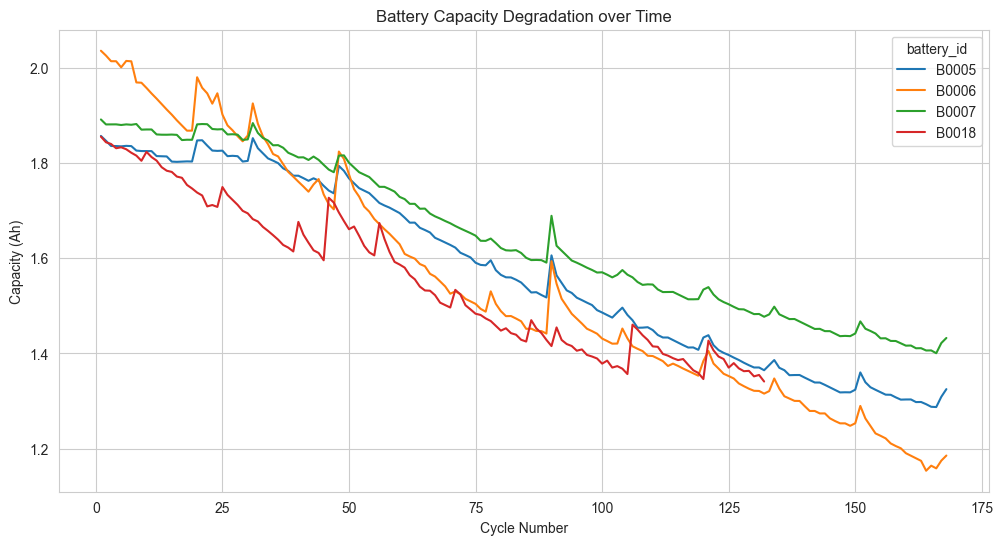

In [ ]:
sns.set_style("whitegrid") #style
plt.figure(figsize=(12, 6))


sns.lineplot(data=df, x='cycle_index', y='discharge_capacity', hue='battery_id') #capacity vs cycle index for each battery

plt.title('Battery Capacity Degradation over Time')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.show()

Spikes represent capacity regeneration. Batteries sat iddle so during the rest the battery recovers temporarily a bit of capacity.